In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway

file_path = 'dag_statistics_full (2).csv'
data = pd.read_csv(file_path)

data.head()

,Branch count,Total edge length,Mean edge length,3d_volume_vasculature,vascular_network_projection_area,vascular_density,branching_points,branching_points_per_pixel,fractal_dimension
0,2809.0,95754.097325,34.088322,3.746945e+08,702686,0.573715,1379,0.001962,1.301972
1,852.0,50823.699242,59.652229,3.835222e+08,726003,0.586972,425,0.000585,1.124727
2,1051.0,41734.187026,39.709027,1.414655e+09,523712,0.377155,524,0.001001,1.220271
3,1658.0,47629.610244,28.727147,2.144545e+08,367875,0.414000,821,0.002232,1.248184
4,1551.0,76391.236698,49.252893,1.070302e+09,666509,0.598907,765,0.001148,1.165769


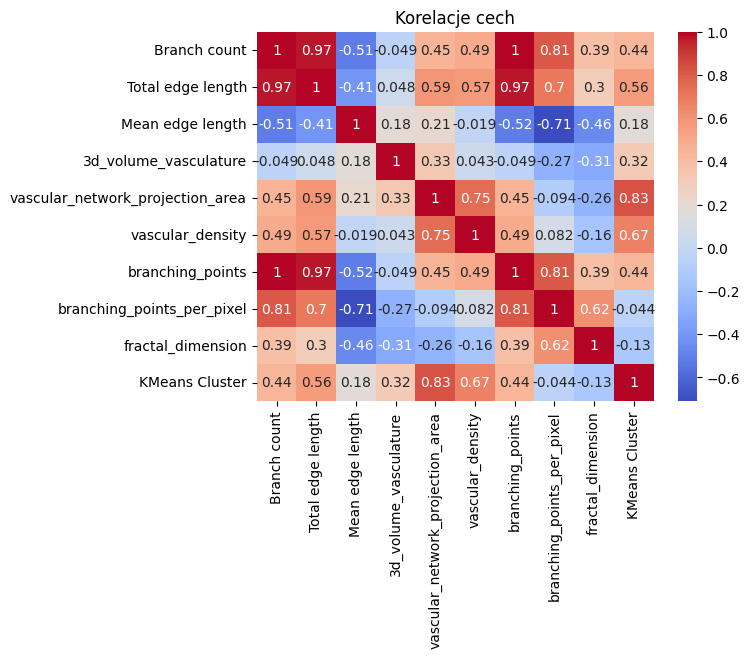

In [45]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelacje cech')
plt.show()

In [129]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [131]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

In [133]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

pca_df['Cluster'] = kmeans_labels
data['KMeans Cluster'] = kmeans_labels

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Zastosowano analizę sylwetki, aby ocenić jakość klasteryzacji K-średnich. Pozwala ona oszacować, czy wybrana liczba klastrów (3) jest optymalna.

In [136]:
from sklearn.metrics import silhouette_score

silhouette_score(scaled_data, kmeans_labels)

0.2539497317356833

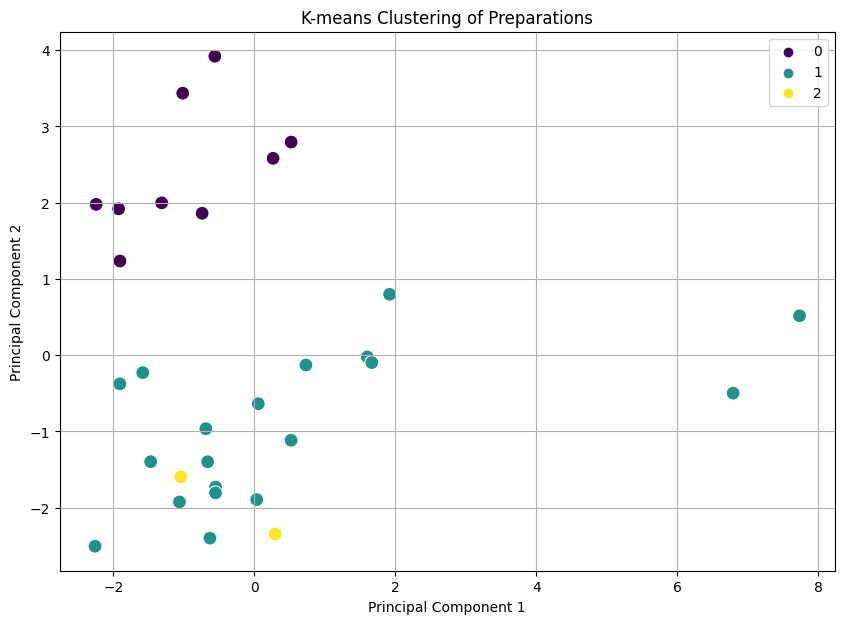

In [138]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, s=100)
plt.title('K-means Clustering of Preparations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.legend()
plt.show()

In [140]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture

linked = linkage(scaled_data, method='ward')
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')
data['Hierarchical Cluster'] = hierarchical_labels

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)
data['GMM Cluster'] = gmm_labels

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [125]:
data

,Branch count,Total edge length,Mean edge length,3d_volume_vasculature,vascular_network_projection_area,vascular_density,branching_points,branching_points_per_pixel,fractal_dimension,Hierarchical Cluster,GMM Cluster
0,2809.0,95754.097325,34.088322,3.746945e+08,702686,0.573715,1379,0.001962,1.301972,3,2
1,852.0,50823.699242,59.652229,3.835222e+08,726003,0.586972,425,0.000585,1.124727,2,1
2,1051.0,41734.187026,39.709027,1.414655e+09,523712,0.377155,524,0.001001,1.220271,2,1
3,1658.0,47629.610244,28.727147,2.144545e+08,367875,0.414000,821,0.002232,1.248184,3,0
4,1551.0,76391.236698,49.252893,1.070302e+09,666509,0.598907,765,0.001148,1.165769,2,1
5,1091.0,32909.853012,30.164852,1.829211e+08,312079,0.335862,538,0.001724,1.234176,3,0
6,2666.0,82458.294848,30.929593,2.153239e+08,387331,0.522894,1309,0.003380,1.342733,3,0
7,2284.0,64570.017739,28.270586,1.390128e+08,293392,0.340675,1119,0.003814,1.461162,3,0
8,3013.0,82874.622338,27.505683,2.353031e+08,438197,0.496400,1470,0.003355,1.379871,3,0
9,7015.0,215914.839417,30.779022,4.756836e+08,931297,0.665368,3427,0.003680,1.323190,1,2


In [142]:
data = data.drop(columns=['GMM Cluster', 'Hierarchical Cluster'])

cluster_0 = data[data['KMeans Cluster'] == 0]
cluster_1 = data[data['KMeans Cluster'] == 1]
cluster_2 = data[data['KMeans Cluster'] == 2]

In [144]:
cluster_stats = data.groupby('KMeans Cluster').describe()
cluster_stats

Branch count                                                    \
                      count         mean          std     min     25%     50%   
KMeans Cluster                                                                  
0                       9.0  1808.666667   772.601773   680.0  1091.0  1893.0   
1                      19.0  2072.894737  2161.387489   310.0   835.5  1226.0   
2                       2.0  1301.000000   353.553391  1051.0  1176.0  1301.0   

                               Total edge length                ...  \
                   75%     max             count          mean  ...   
KMeans Cluster                                                  ...   
0               2284.0  3013.0               9.0  55211.159888  ...   
1               2542.5  8426.0              19.0  76329.406830  ...   
2               1426.0  1551.0               2.0  59062.711862  ...   

               branching_points_per_pixel           fractal_dimension  \
                                      75%       max             count   
KMeans Cluster                                                          
0                                0.003380  0.003814               9.0   
1                                0.001767  0.004805              19.0   
2                                0.001111  0.001148               2.0   

                                                                            \
                    mean       std       min       25%       50%       75%   
KMeans Cluster                                                               
0               1.344553  0.074047  1.234176  1.292262  1.362469  1.379871   
1               1.235565  0.098568  1.124727  1.164514  1.201204  1.304864   
2               1.193020  0.038539  1.165769  1.179395  1.193020  1.206646   

                          
                     max  
KMeans Cluster            
0               1.461162  
1               1.507942  
2               1.220271  

[3 rows x 72 columns]

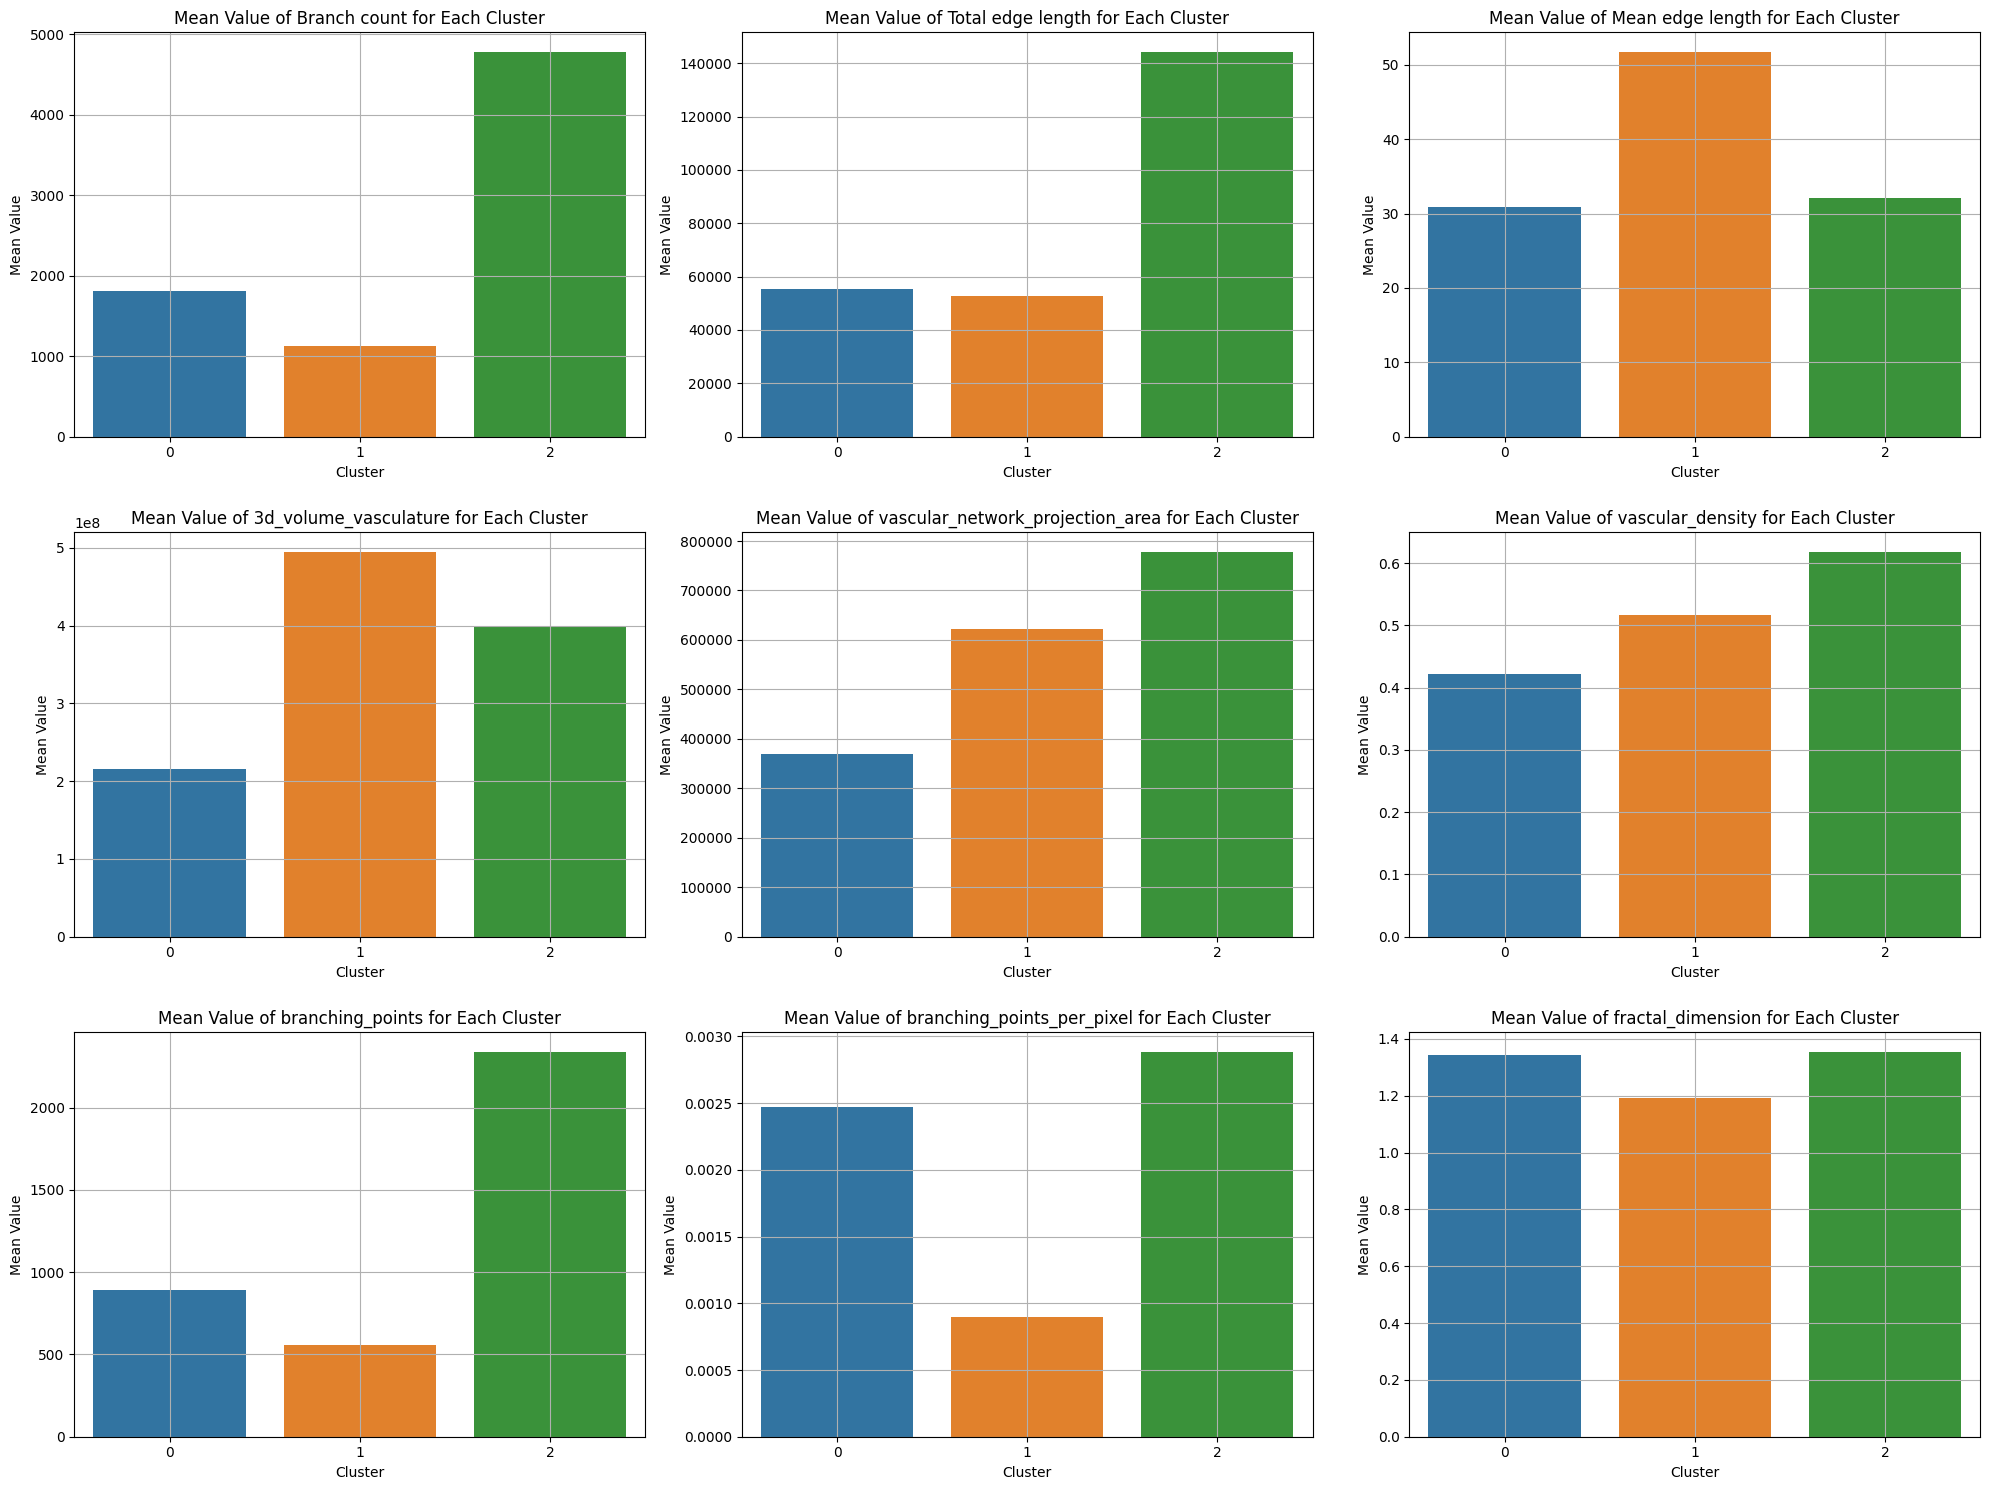

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wyodrębnienie średnich wartości cech dla każdego klastra
cluster_stats_mean = cluster_stats.loc[:, (slice(None), 'mean')]
cluster_stats_mean.columns = cluster_stats_mean.columns.droplevel(1)

# Przekształcenie danych do długiego formatu
mean_melted = cluster_stats_mean.reset_index().melt(id_vars='KMeans Cluster', var_name='Feature', value_name='Mean')

# Ustawienia subplotów
num_features = len(cluster_stats_mean.columns)
fig, axes = plt.subplots(nrows=(num_features + 2) // 3, ncols=3, figsize=(20, 5 * ((num_features + 2) // 3)))

# Wizualizacja średnich wartości cech
for i, feature in enumerate(cluster_stats_mean.columns):
    ax = axes[i // 3, i % 3]
    sns.barplot(ax=ax, x='KMeans Cluster', y='Mean', data=mean_melted[mean_melted['Feature'] == feature])
    ax.set_title(f'Mean Value of {feature} for Each Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Mean Value')
    ax.grid(True)

# Usunięcie pustych subplotów
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()



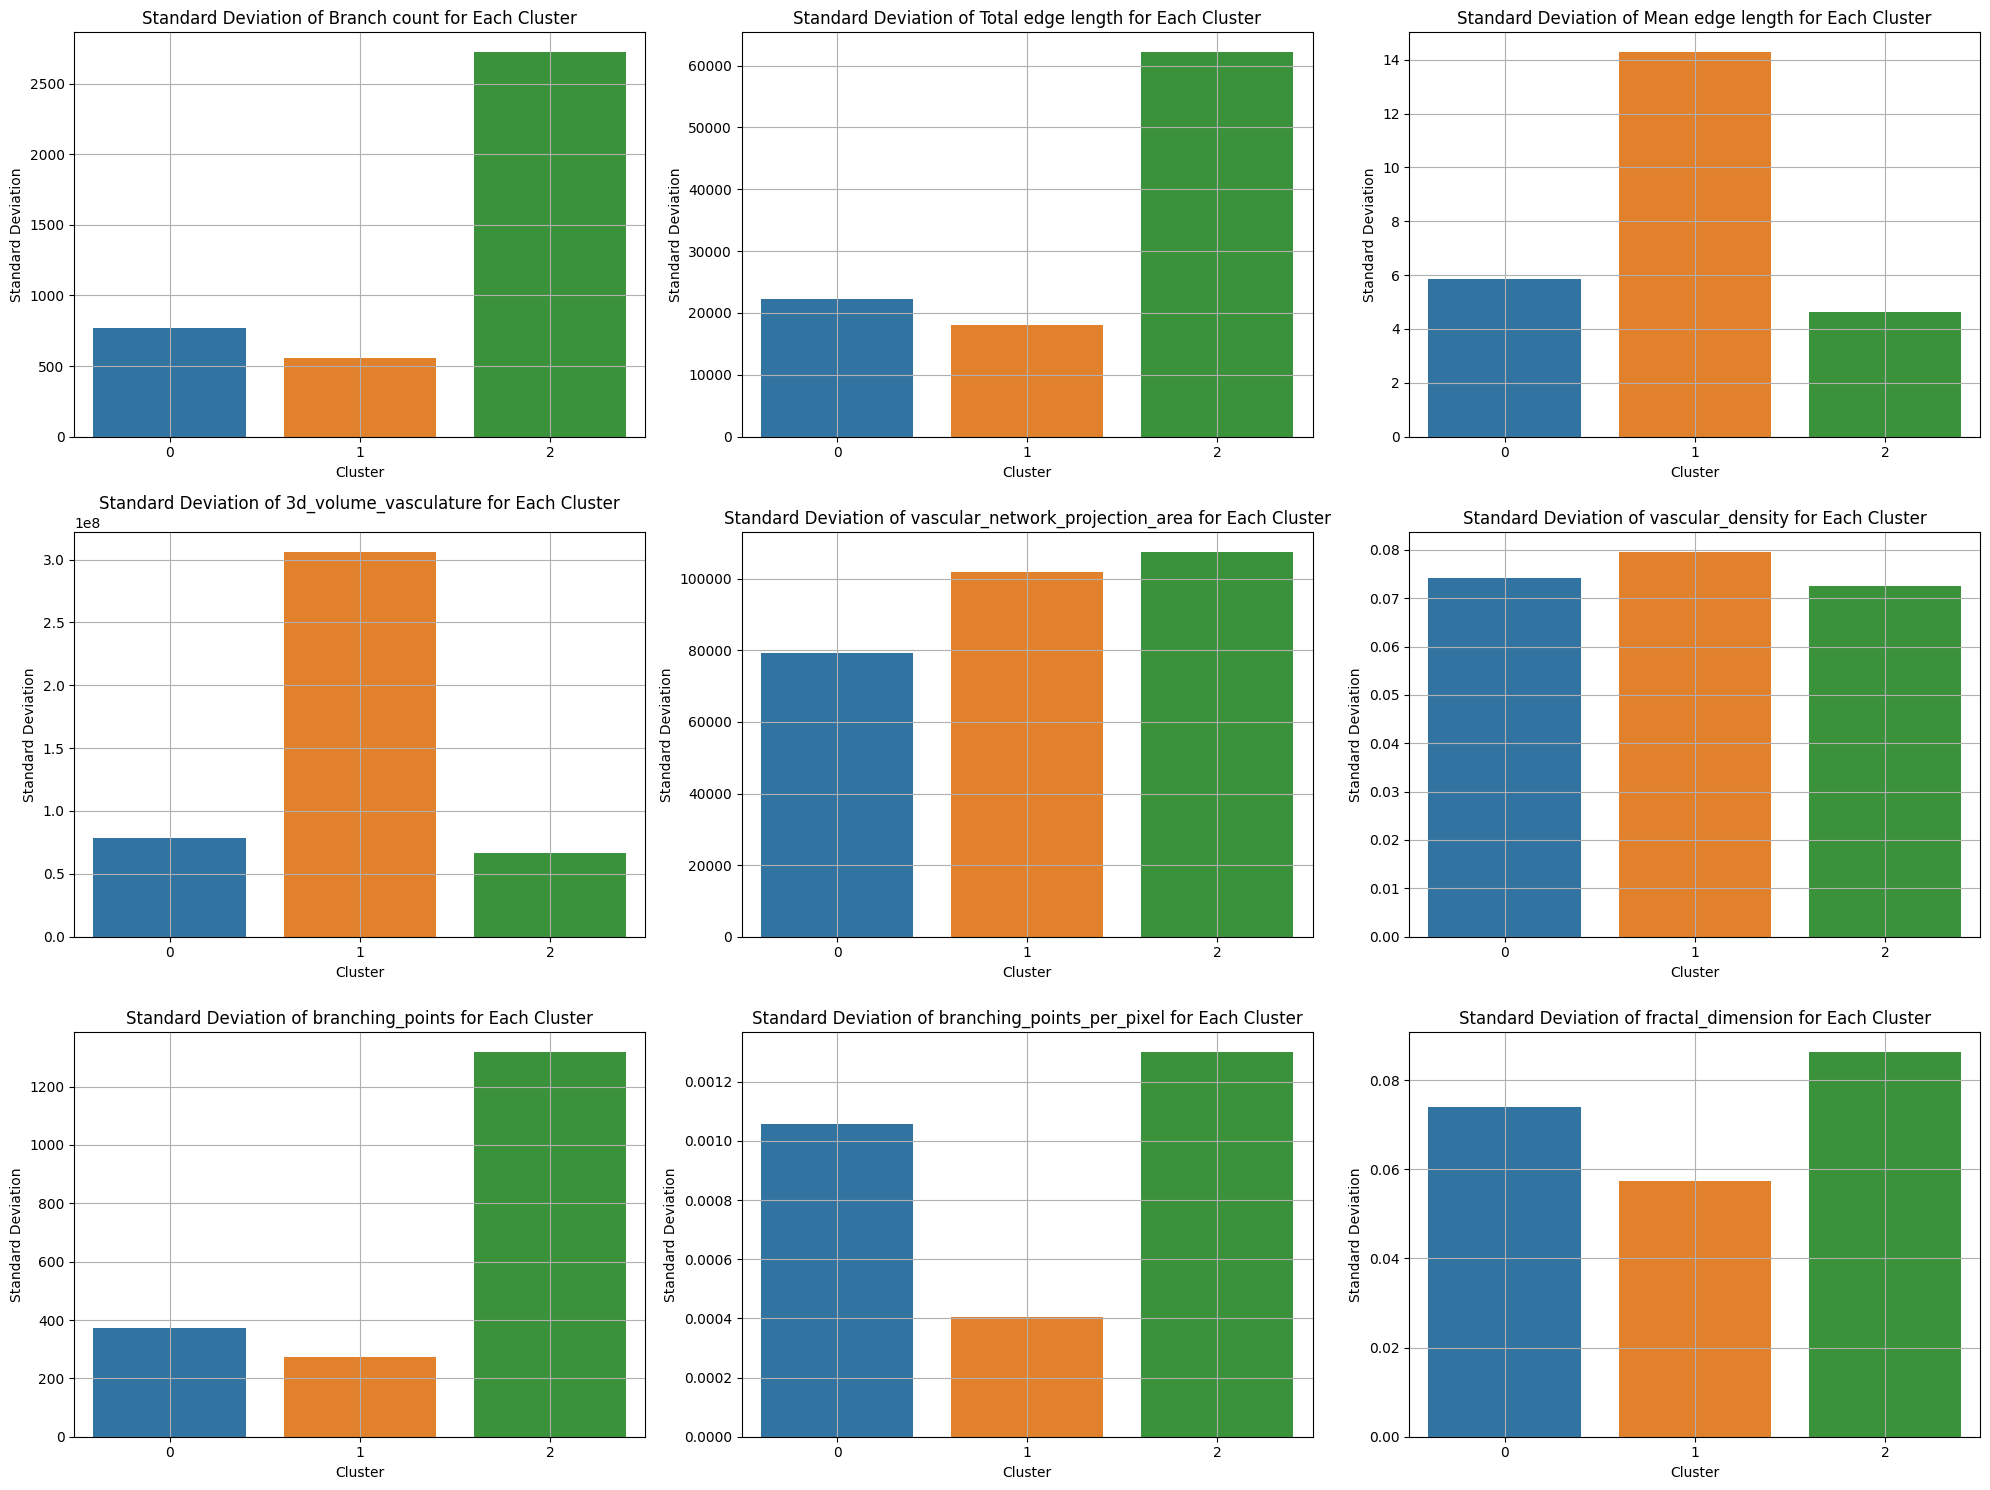

In [103]:
# Wyodrębnienie odchylenia standardowego cech dla każdego klastra
cluster_stats_std = cluster_stats.loc[:, (slice(None), 'std')]
cluster_stats_std.columns = cluster_stats_std.columns.droplevel(1)

# Przekształcenie danych do długiego formatu
std_melted = cluster_stats_std.reset_index().melt(id_vars='KMeans Cluster', var_name='Feature', value_name='Standard Deviation')

# Ustawienia subplotów
fig, axes = plt.subplots(nrows=(num_features + 2) // 3, ncols=3, figsize=(20, 5 * ((num_features + 2) // 3)))

# Wizualizacja odchylenia standardowego cech
for i, feature in enumerate(cluster_stats_std.columns):
    ax = axes[i // 3, i % 3]
    sns.barplot(ax=ax, x='KMeans Cluster', y='Standard Deviation', data=std_melted[std_melted['Feature'] == feature])
    ax.set_title(f'Standard Deviation of {feature} for Each Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Standard Deviation')
    ax.grid(True)

# Usunięcie pustych subplotów
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [43]:
cluster_stats = data.groupby('KMeans Cluster').describe()
print(cluster_stats)


               Branch count                                                    \
                      count         mean          std     min     25%     50%   
KMeans Cluster                                                                  
0                       9.0  1808.666667   772.601773   680.0  1091.0  1893.0   
1                      16.0  1128.875000   554.356789   310.0   796.5  1074.0   
2                       5.0  4785.000000  2727.606552  2697.0  2809.0  2978.0   

                               Total edge length                 ...  \
                   75%     max             count           mean  ...   
KMeans Cluster                                                   ...   
0               2284.0  3013.0               9.0   55211.159888  ...   
1               1513.5  2388.0              16.0   52898.826595  ...   
2               7015.0  8426.0               5.0  144400.585595  ...   

               branching_points_per_pixel           fractal_dimension  \
       

In [49]:
cluster_stats = data.groupby('KMeans Cluster').describe(include='all')
print(cluster_stats)


               Branch count                                                    \
                      count         mean          std     min     25%     50%   
KMeans Cluster                                                                  
0                       9.0  1808.666667   772.601773   680.0  1091.0  1893.0   
1                      16.0  1128.875000   554.356789   310.0   796.5  1074.0   
2                       5.0  4785.000000  2727.606552  2697.0  2809.0  2978.0   

                               Total edge length                 ...  \
                   75%     max             count           mean  ...   
KMeans Cluster                                                   ...   
0               2284.0  3013.0               9.0   55211.159888  ...   
1               1513.5  2388.0              16.0   52898.826595  ...   
2               7015.0  8426.0               5.0  144400.585595  ...   

               branching_points_per_pixel           fractal_dimension  \
       

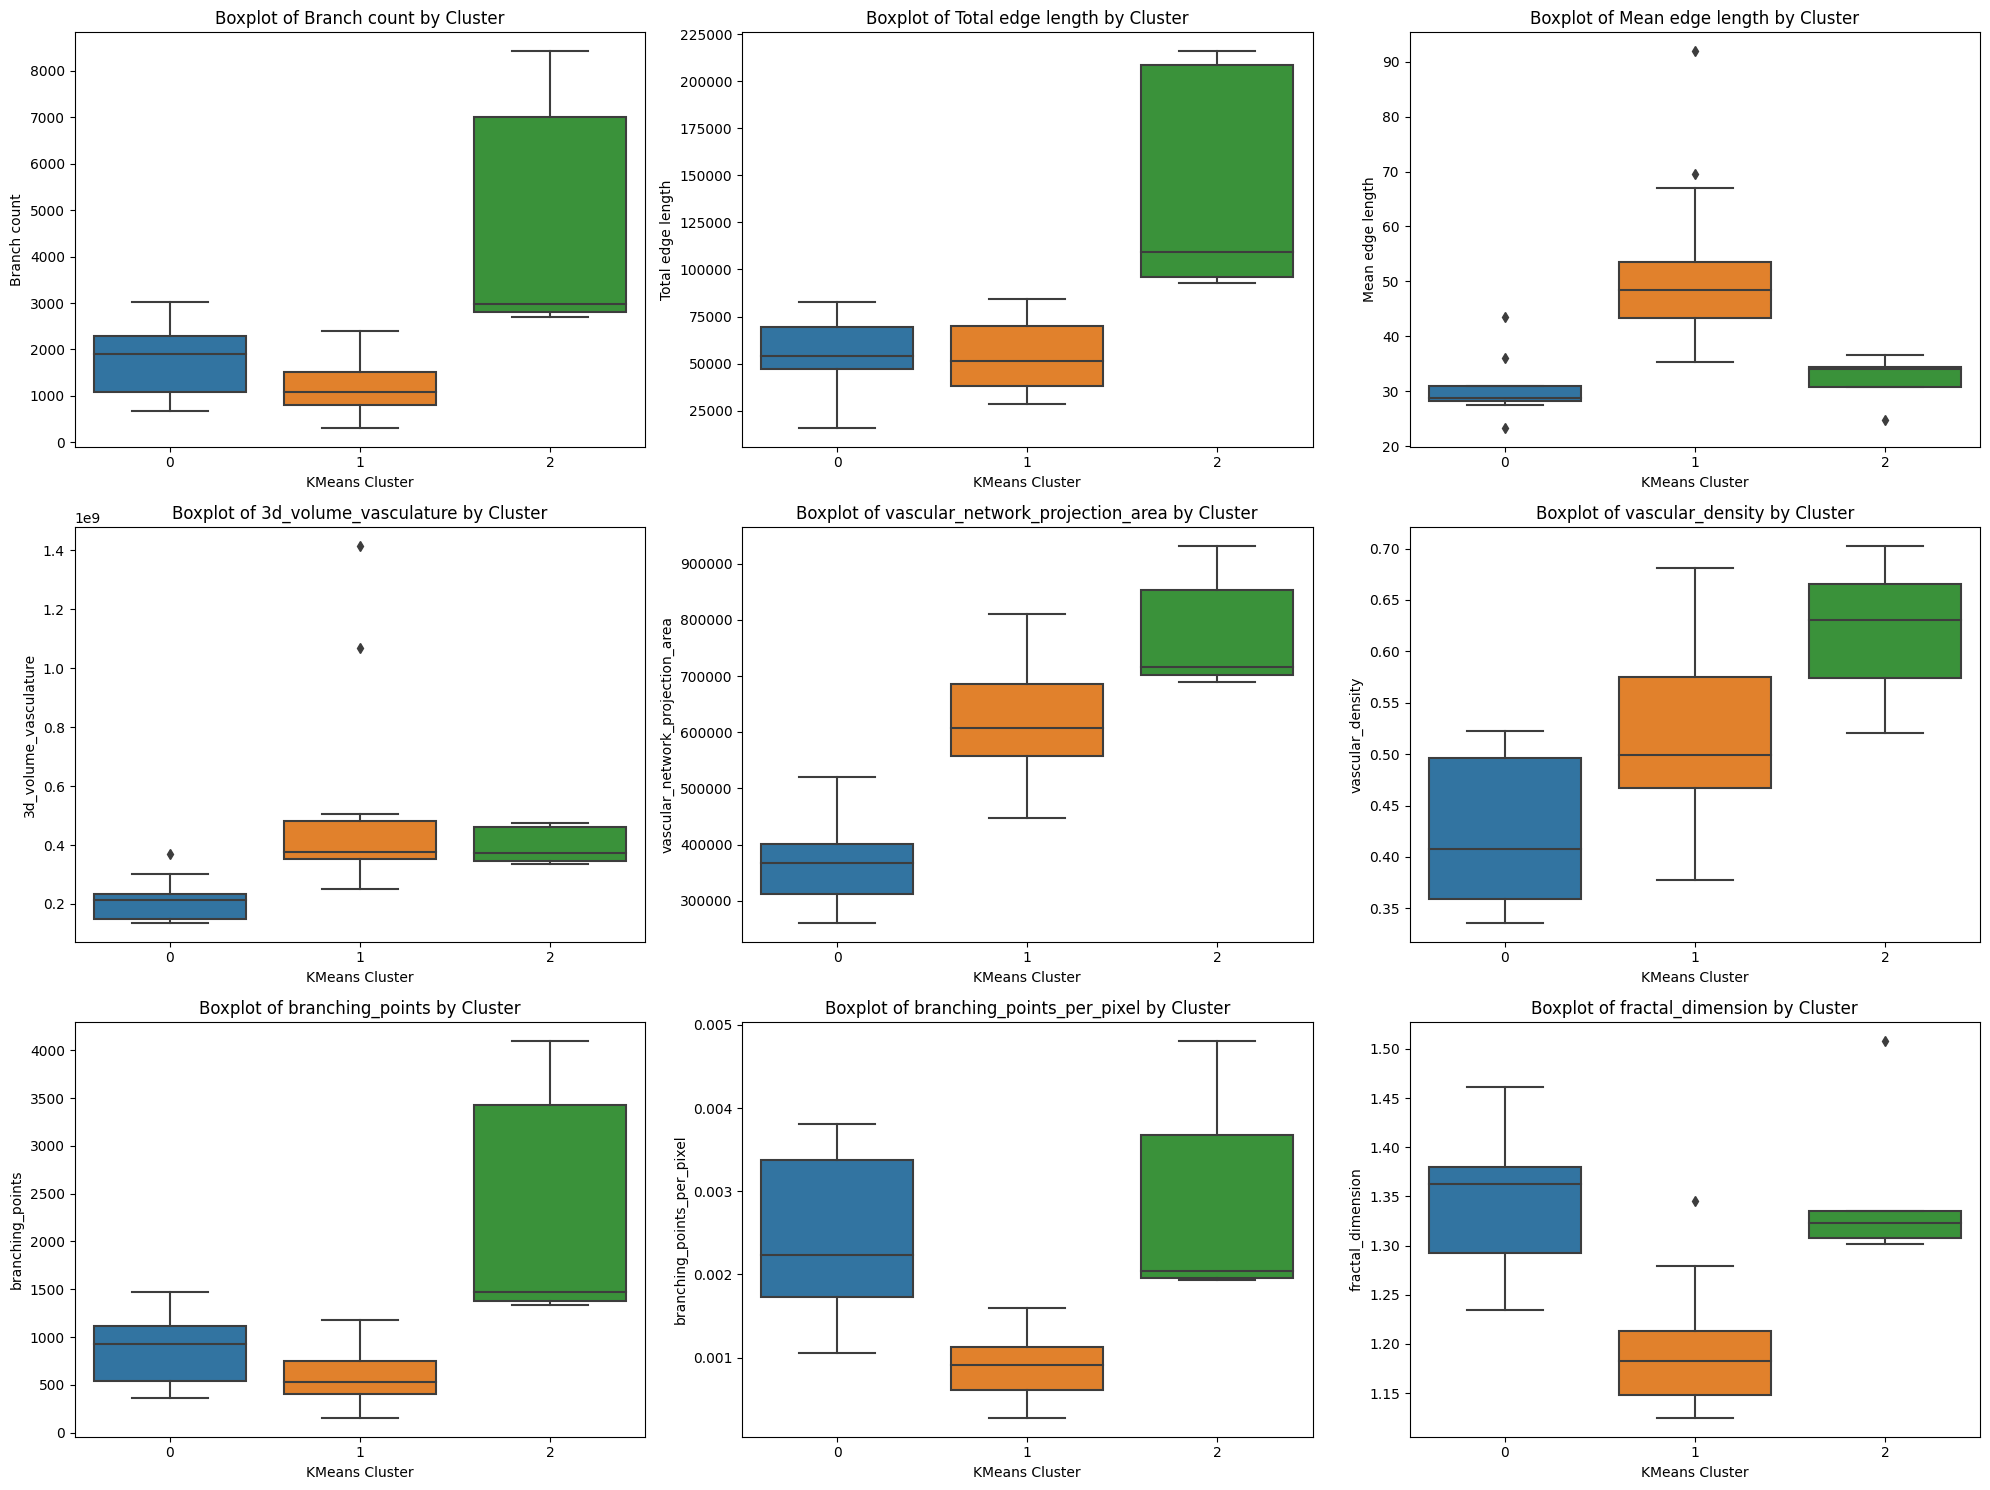

In [10]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='KMeans Cluster', y=column, data=data)
    plt.title(f'Boxplot of {column} by Cluster')
plt.tight_layout()
plt.show()

In [11]:
mean_values = data.groupby('KMeans Cluster').mean()
mean_values

,Branch count,Total edge length,Mean edge length,3d_volume_vasculature,vascular_network_projection_area,vascular_density,branching_points,branching_points_per_pixel,fractal_dimension
KMeans Cluster,,,,,,,,,
0,1808.666667,55211.159888,30.824694,2.158793e+08,369448.777778,0.422327,891.777778,0.002474,1.344553
1,1128.875000,52898.826595,51.773263,4.952188e+08,622125.437500,0.517309,560.187500,0.000901,1.192856
2,4785.000000,144400.585595,32.124616,3.985037e+08,778538.800000,0.618519,2340.400000,0.002885,1.355218


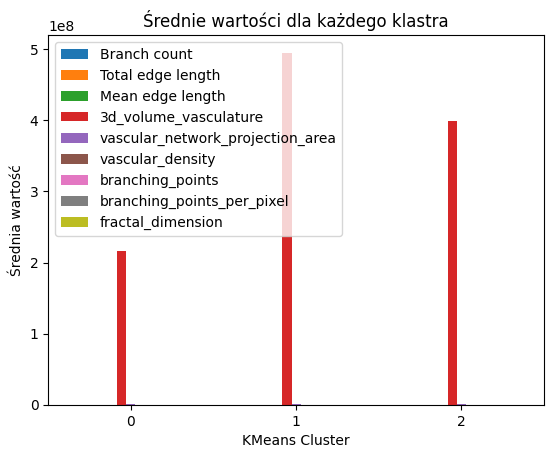

In [109]:
import matplotlib.pyplot as plt

# Załóżmy, że mean_values to DataFrame zawierający średnie wartości dla każdego klastra
mean_values.plot(kind='bar')
plt.xlabel('KMeans Cluster')
plt.ylabel('Średnia wartość')
plt.title('Średnie wartości dla każdego klastra')
plt.xticks(rotation=0)
plt.show()


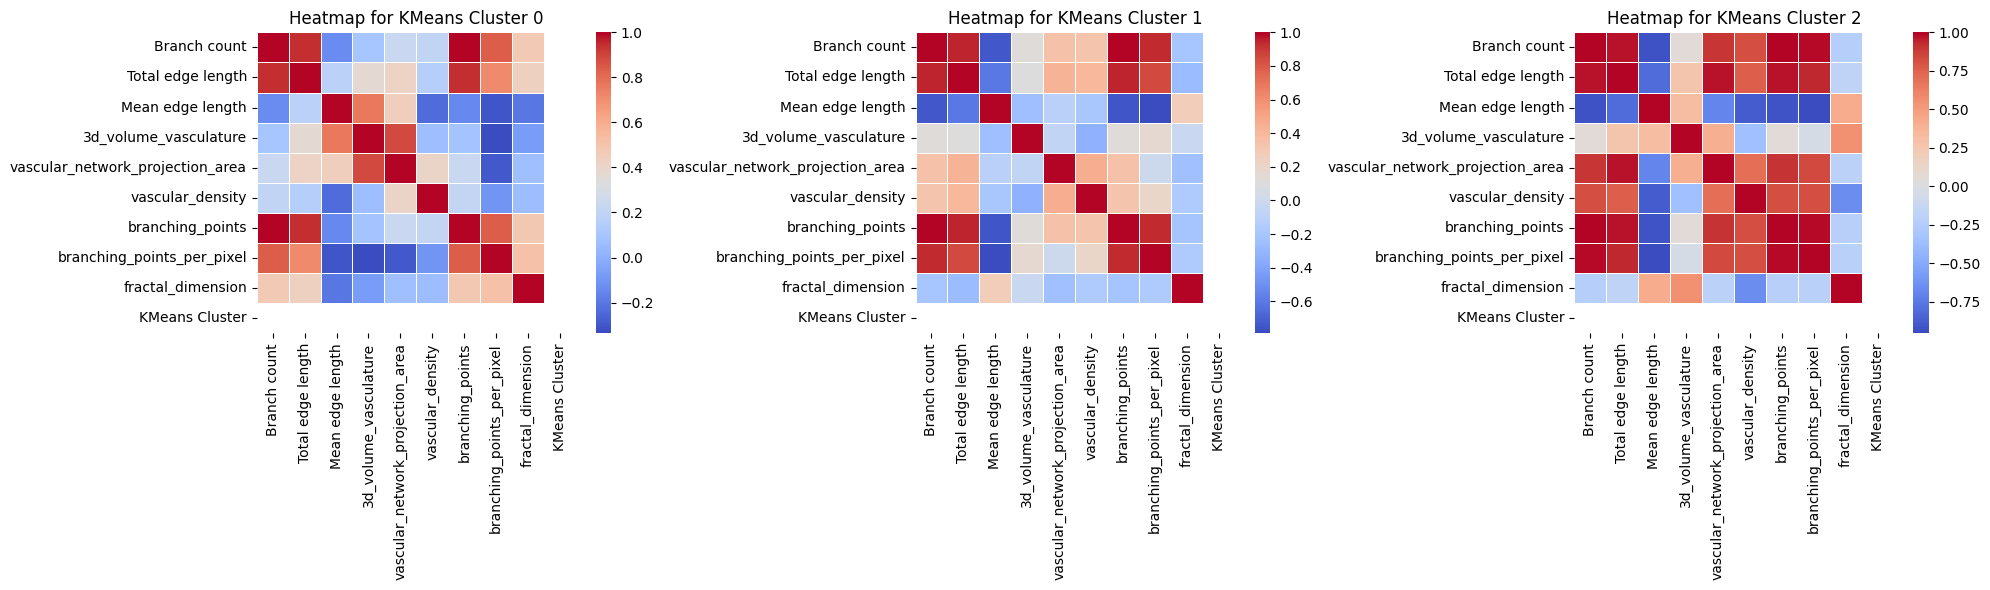

In [12]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.heatmap(cluster_0.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap for KMeans Cluster 0')

plt.subplot(1, 3, 2)
sns.heatmap(cluster_1.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap for KMeans Cluster 1')

plt.subplot(1, 3, 3)
sns.heatmap(cluster_2.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap for KMeans Cluster 2')

plt.tight_layout()
plt.show()

In [53]:
from scipy.stats import f_oneway

# Przeprowadzenie testu ANOVA dla każdej cechy
anova_results = {}
for column in data.columns[:-1]:  # Pomijamy kolumnę z etykietami klastrów
    cluster_0 = data[data['KMeans Cluster'] == 0][column]
    cluster_1 = data[data['KMeans Cluster'] == 1][column]
    cluster_2 = data[data['KMeans Cluster'] == 2][column]
    f_stat, p_value = f_oneway(cluster_0, cluster_1, cluster_2)
    anova_results[column] = (f_stat, p_value)

# Wyświetlenie wyników ANOVA
anova_results_df = pd.DataFrame(anova_results, index=['F-statistic', 'p-value']).T
anova_results_df = anova_results_df.sort_values(by='p-value')

print("ANOVA Results by Feature")
print(anova_results_df)


ANOVA Results by Feature
                                  F-statistic       p-value
vascular_network_projection_area    33.299822  5.142913e-08
fractal_dimension                   19.844425  4.996802e-06
Total edge length                   19.006988  7.044011e-06
branching_points                    17.823006  1.162384e-05
Branch count                        17.641176  1.257428e-05
branching_points_per_pixel          16.813203  1.809157e-05
Mean edge length                    12.360412  1.544997e-04
vascular_density                    10.830324  3.519730e-04
3d_volume_vasculature                4.115249  2.754275e-02


C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

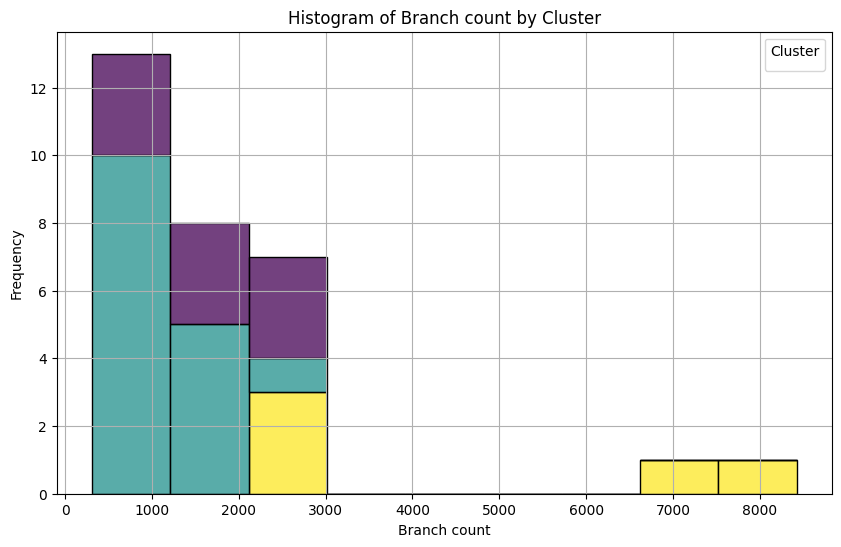

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

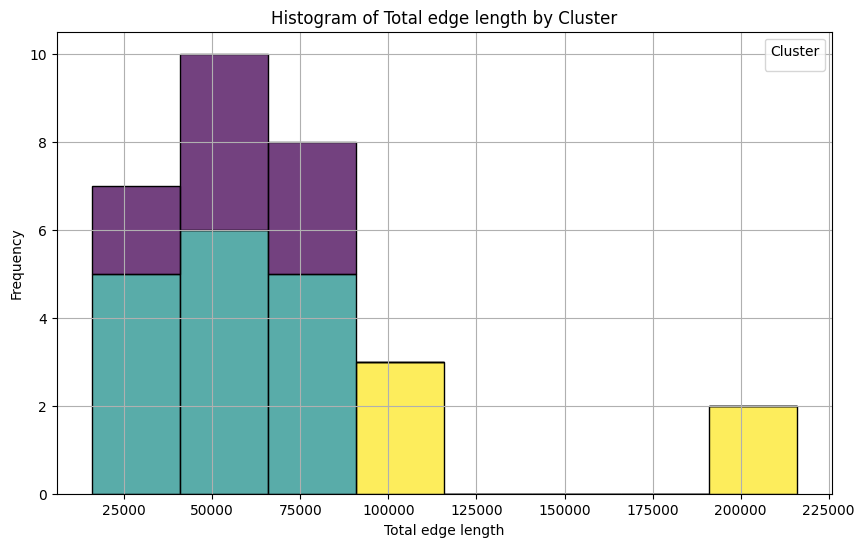

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

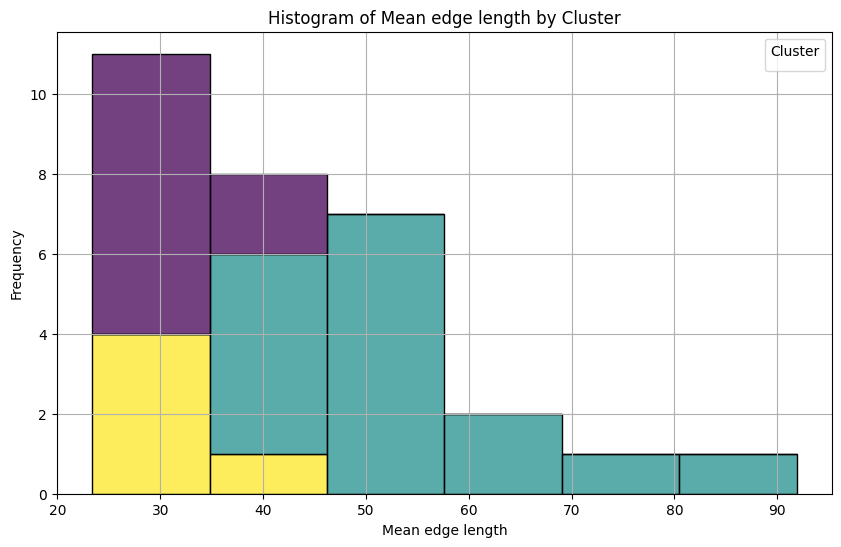

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

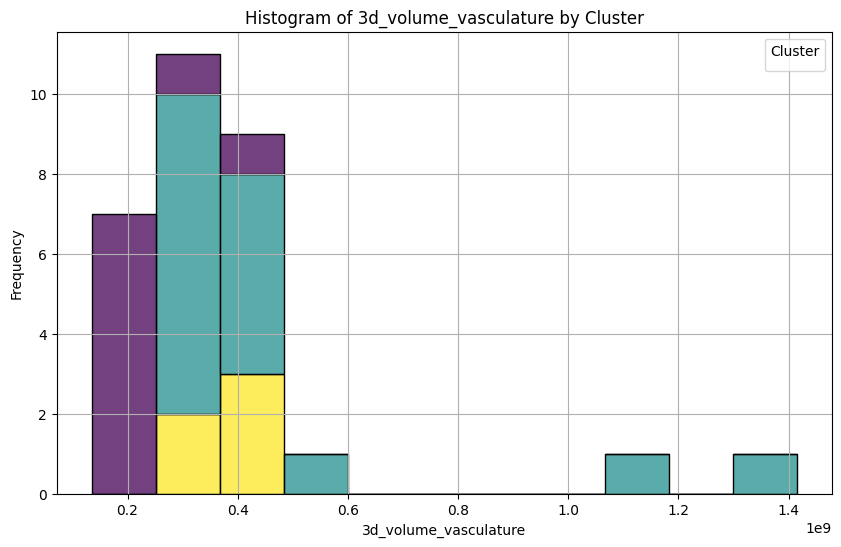

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

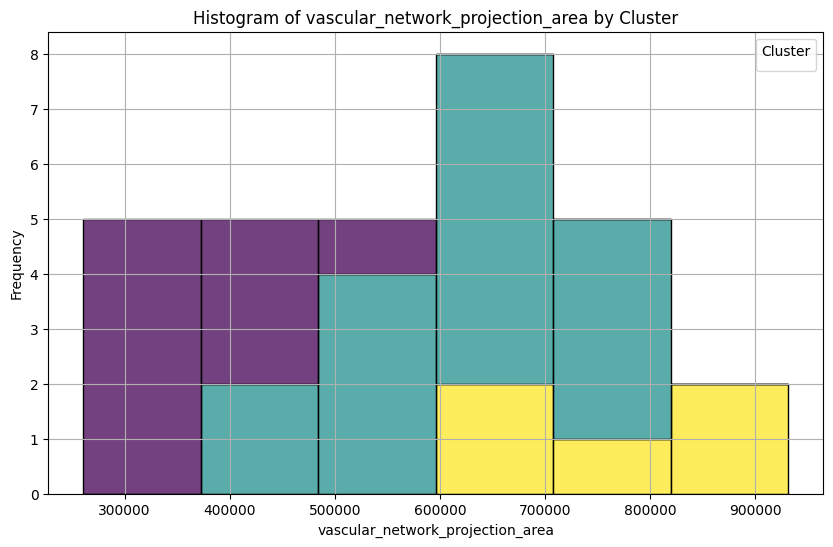

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

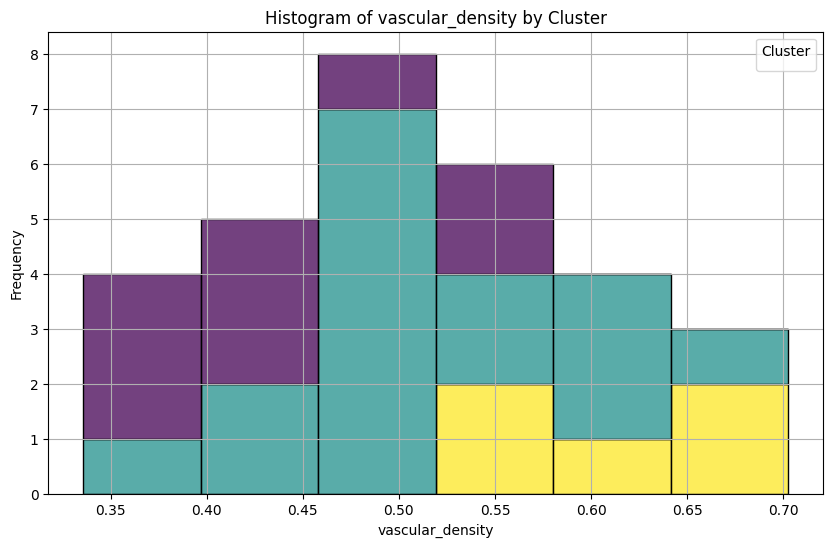

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

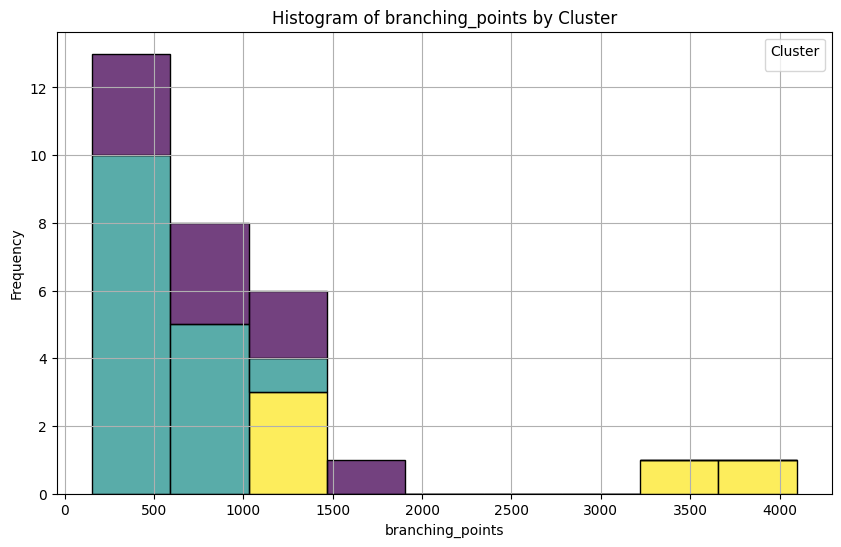

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

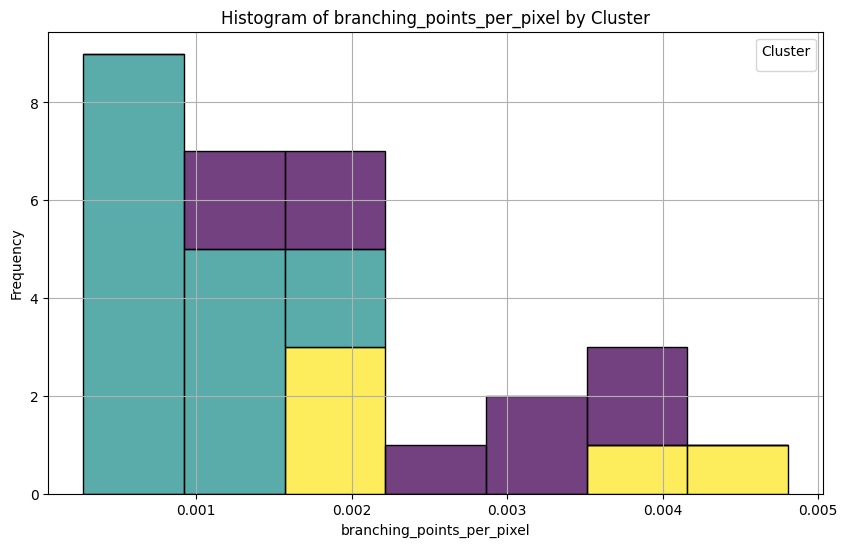

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

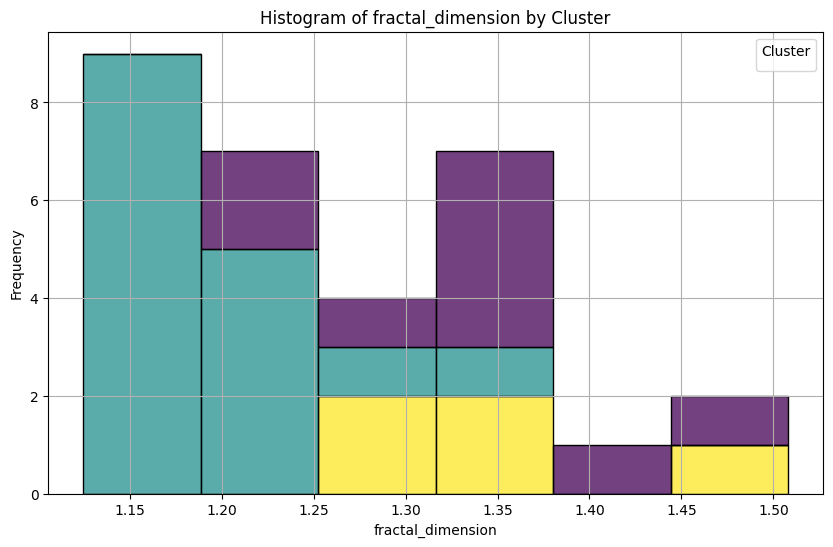

In [55]:
# Histogramy dla kluczowych cech wewnątrz klastrów
for column in data.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, hue='KMeans Cluster', multiple='stack', palette='viridis')
    plt.title(f'Histogram of {column} by Cluster')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


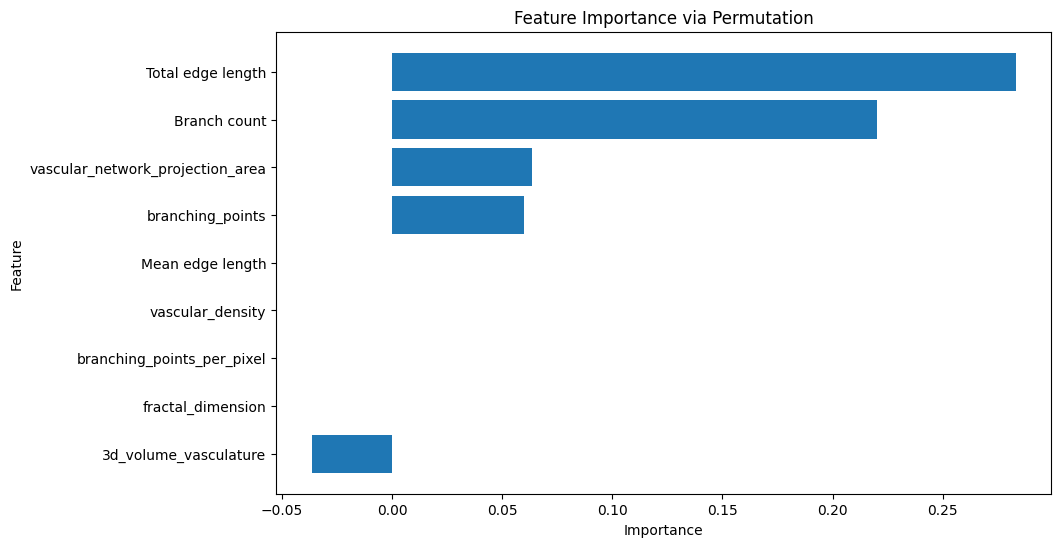

Key Findings:
1. Features with highest importance:
   Importance                           Feature
1    0.283333                 Total edge length
0    0.220000                      Branch count
4    0.063333  vascular_network_projection_area
6    0.060000                  branching_points
2    0.000000                  Mean edge length
5    0.000000                  vascular_density
7    0.000000        branching_points_per_pixel
8    0.000000                 fractal_dimension
3   -0.036667             3d_volume_vasculature

2. ANOVA results indicating significant differences between clusters:
                                  F-statistic       p-value
vascular_network_projection_area    33.299822  5.142913e-08
fractal_dimension                   19.844425  4.996802e-06
Total edge length                   19.006988  7.044011e-06
branching_points                    17.823006  1.162384e-05
Branch count                        17.641176  1.257428e-05
branching_points_per_pixel          16

NameError: name 'key_features' is not defined

In [69]:

# Ocena ważności cech (Permutation Importance)
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

X = data.drop(columns=['KMeans Cluster'])
y = data['KMeans Cluster']

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
importance_data = pd.DataFrame(result.importances_mean, columns=['Importance'])

# Dodanie nazw cech
importance_data['Feature'] = X.columns

# Sortowanie według ważności
importance_data = importance_data.sort_values(by='Importance', ascending=False)

# Wizualizacja ważności cech
plt.figure(figsize=(10, 6))
plt.barh(importance_data['Feature'], importance_data['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance via Permutation')
plt.gca().invert_yaxis()
plt.show()

# Podsumowanie i wnioski
print("Key Findings:")
print("1. Features with highest importance:")
print(importance_data)
print("\n2. ANOVA results indicating significant differences between clusters:")
print(anova_results_df)
print("\n3. Mean values of key features by cluster:")
print(mean_values[key_features])

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

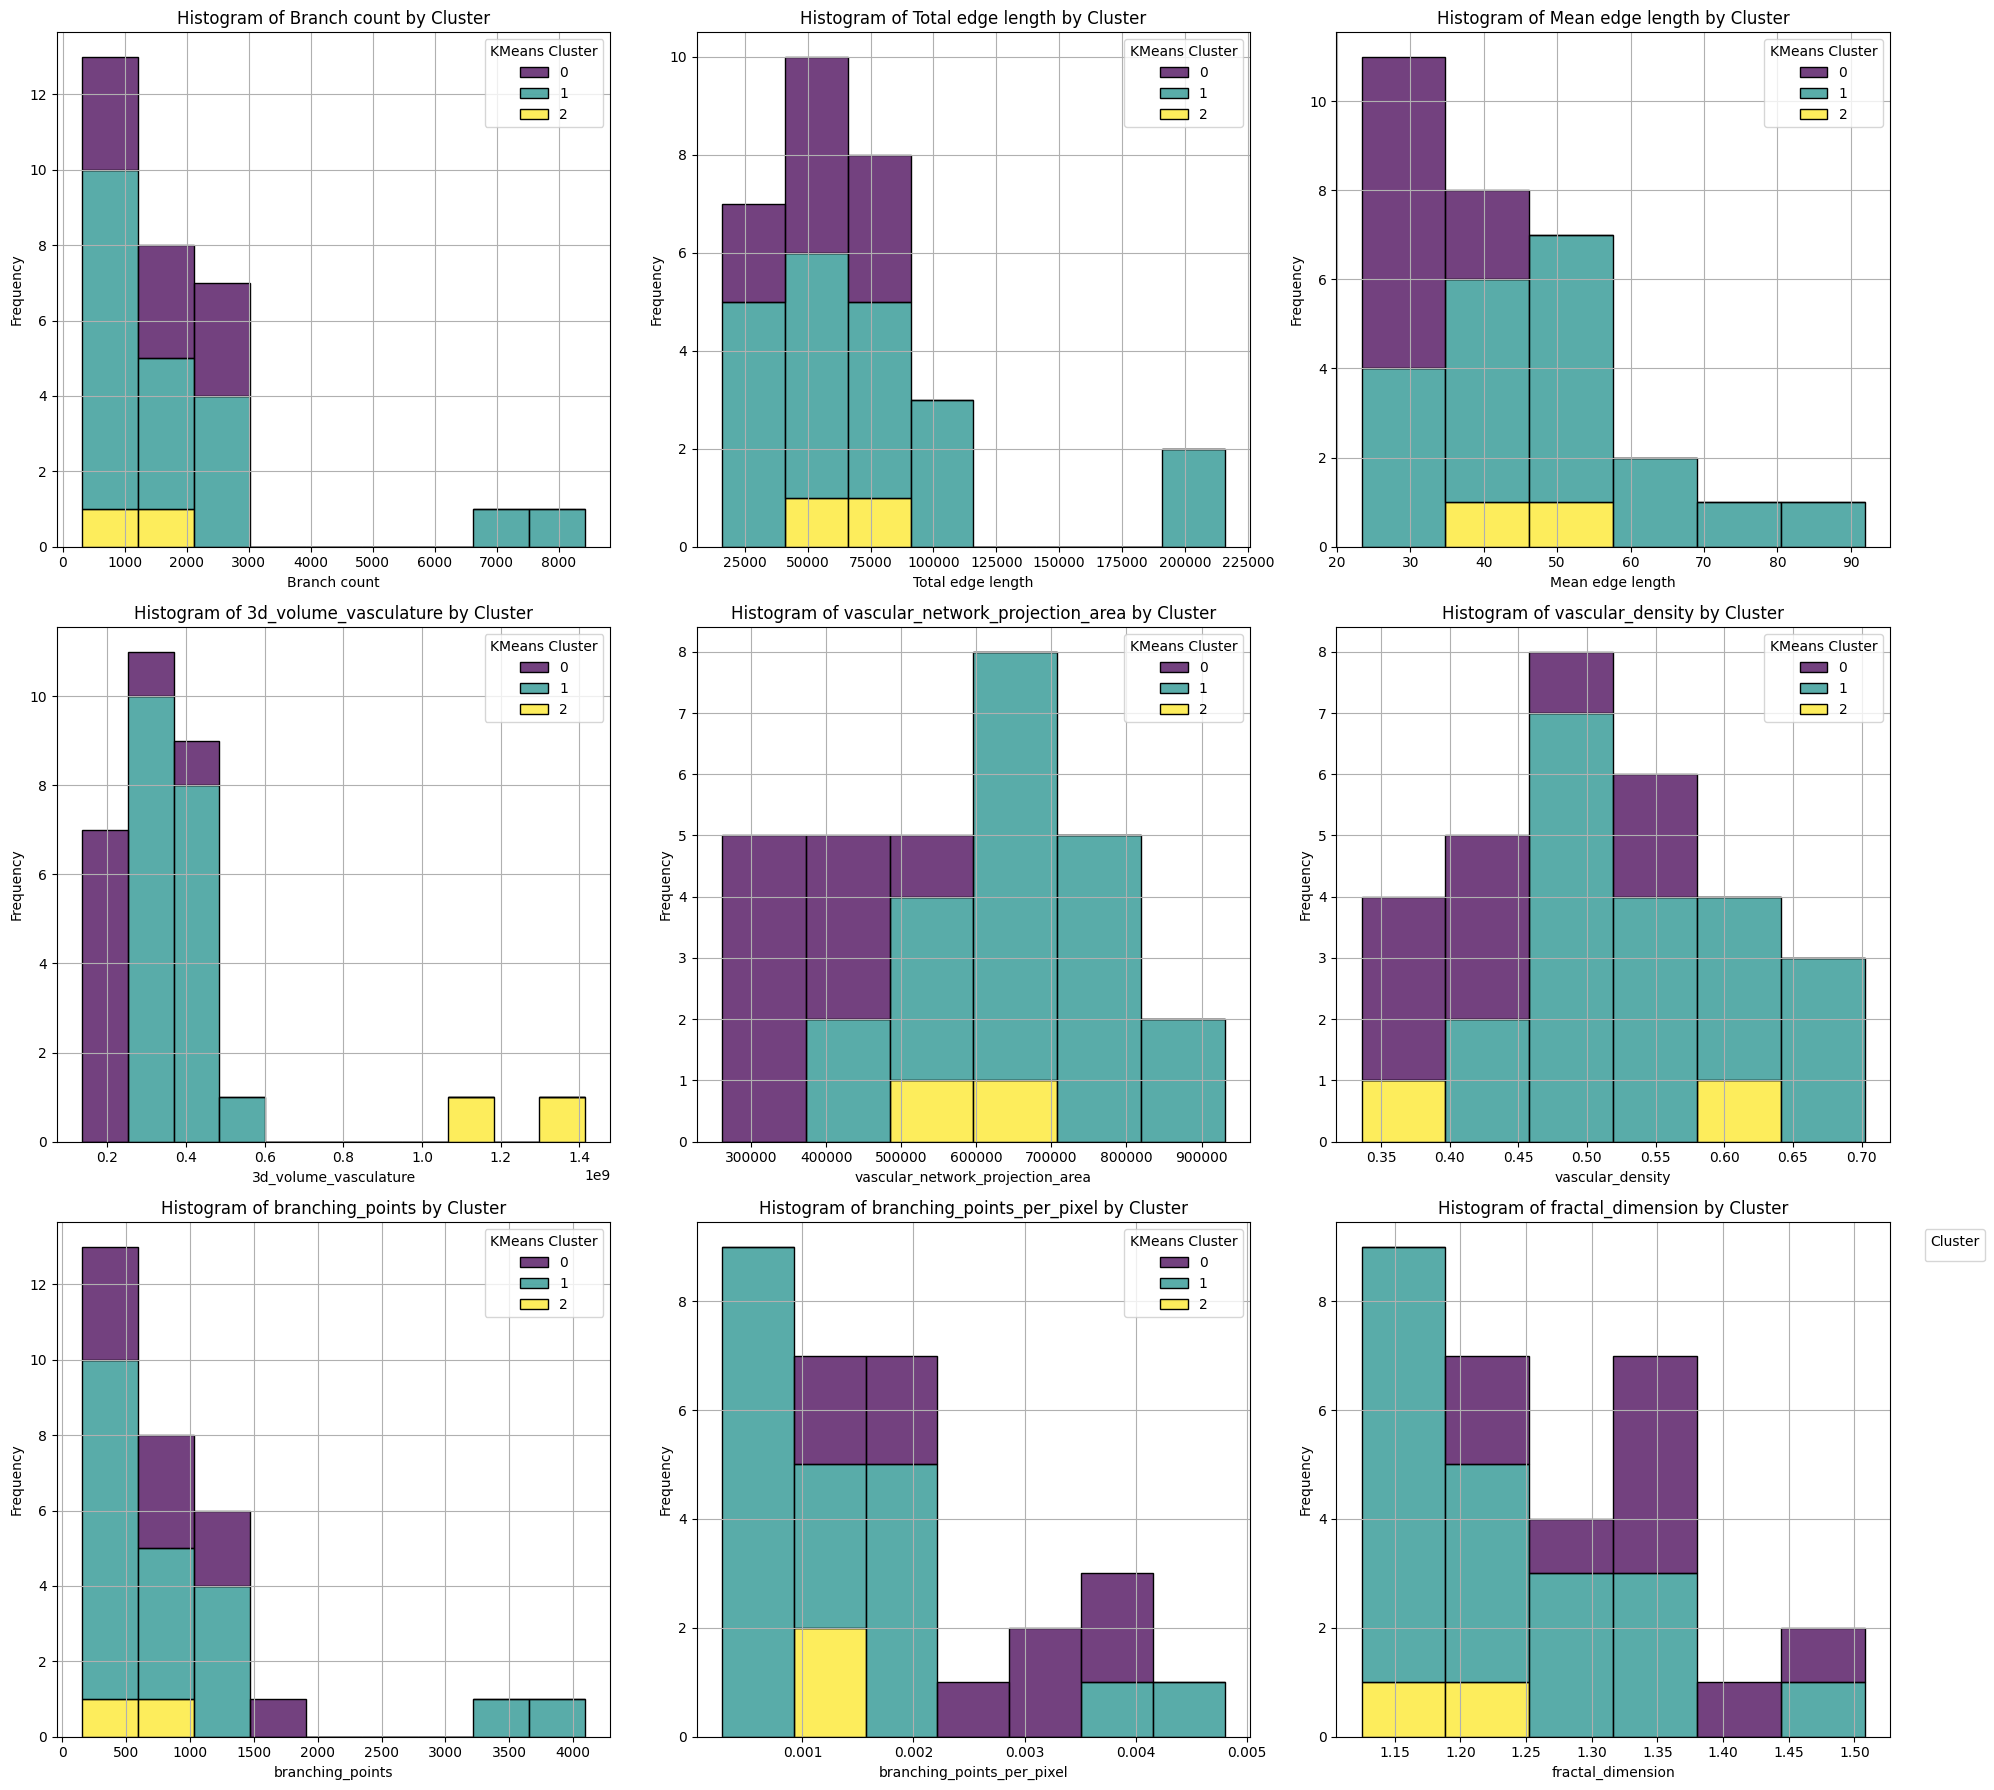

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liczba kluczowych cech do wizualizacji
num_features = len(data.columns[:-1])

# Ustal ilość kolumn w subplotach
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Ustal rozmiar figury
plt.figure(figsize=(20, 6 * num_rows))

# Tworzenie subplotów dla każdej kluczowej cechy
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=data, x=column, hue='KMeans Cluster', multiple='stack', palette='viridis')
    plt.title(f'Histogram of {column} by Cluster')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

# Dodanie wspólnej legendy
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Dopasowanie layoutu
plt.tight_layout()
plt.show()


In [154]:
X = data.drop(columns=['target', 'KMeans Cluster'])  # Usuwamy tylko kolumnę klastra, bo inne już usunęliśmy
y_regression = data['target']

cluster_models = {}

for cluster in data['KMeans Cluster'].unique():
    X_cluster = X[data['KMeans Cluster'] == cluster]
    y_cluster_reg = y_regression[data['KMeans Cluster'] == cluster]
    
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_cluster, y_cluster_reg, test_size=0.3, random_state=42)
    
    cluster_models[cluster] = {
        'X_train_reg': X_train_reg, 'X_test_reg': X_test_reg, 'y_train_reg': y_train_reg, 'y_test_reg': y_test_reg
    }


In [160]:
regression_results = []

for cluster in cluster_models:
    lr = LinearRegression()
    lr.fit(cluster_models[cluster]['X_train_reg'], cluster_models[cluster]['y_train_reg'])
    
    y_pred_reg = lr.predict(cluster_models[cluster]['X_test_reg'])
    mse = mean_squared_error(cluster_models[cluster]['y_test_reg'], y_pred_reg)
    
    regression_results.append((cluster, mse))
    print(f'Cluster {cluster} - Linear Regression MSE: {mse}')


Cluster 0 - Linear Regression MSE: 20.914728861999265
Cluster 1 - Linear Regression MSE: 49.761334934126175
Cluster 2 - Linear Regression MSE: 5.639378697404029


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway

In [164]:
print("Regression Results (MSE) by Cluster")
for result in regression_results:
    print(f'Cluster {result[0]}: {result[1]}')

Regression Results (MSE) by Cluster
Cluster 0: 20.914728861999265
Cluster 1: 49.761334934126175
Cluster 2: 5.639378697404029


In [170]:
for cluster in cluster_models:
    lr = LinearRegression()
    lr.fit(cluster_models[cluster]['X_train_reg'], cluster_models[cluster]['y_train_reg'])
    coefficients = pd.DataFrame(lr.coef_, cluster_models[cluster]['X_train_reg'].columns, columns=['Coefficient'])
    print(f'Cluster {cluster} - Coefficients:')
    print(coefficients)
    print()


Cluster 0 - Coefficients:
                                   Coefficient
Branch count                      4.539778e-07
Total edge length                 9.383696e-06
Mean edge length                 -6.784897e-10
3d_volume_vasculature             3.223355e-08
vascular_network_projection_area  1.236283e-05
vascular_density                  8.853430e-12
branching_points                  2.197624e-07
branching_points_per_pixel        2.296967e-13
fractal_dimension                 8.216652e-12
class_target                      5.303653e-11

Cluster 1 - Coefficients:
                                   Coefficient
Branch count                     -1.086896e-01
Total edge length                -5.229973e-04
Mean edge length                  8.283361e-02
3d_volume_vasculature             1.140408e-08
vascular_network_projection_area -2.089146e-05
vascular_density                  3.219830e+01
branching_points                  2.627423e-01
branching_points_per_pixel       -1.252703e+04
fractal